# Applying Lessons...
Code along with [this blog](https://towardsdatascience.com/99-lessons-on-data-analysis-from-placing-top-5-in-5-kaggle-analytics-challenges-453d5e7b4581) by Leonie Monigatti

In [1]:
# importing libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Lesson 1: Exploratory vs Explanatory Analysis
### Exploratory
- Needle in a haystack

### Explanatory
- Using 1 to only a few findings (or report of no significant findings) to tell a story
- Select best approach after many iterations

## Lesson 2: Read and understand the problem statement.
Any analytical reporting should always start with ***why/how/what...etc***.
- What is this for?
- Who needs this?
- How will this be used to make decisions?
- Who will use it?
- What is the most important thing that needs to be shown?
- How often will this be used?
- How is success measured and defined?

## Lesson 3: Become a data detective and know the data
- What are the fields and what do they mean?
- What type of data do you have?
- Are there missing/unusual values? Why is that?
- Your outliers may have gold nuggets that lead you to your big takeaways

## Lesson 4: You only need three types of plot for univariate analysis
Numerical features
- Boxplots
- Histograms

Categorical features
- Bar charts (count plots)

In [3]:
df = pd.read_csv('tableauTxDeathRowData.csv')
df.head(3)

,execution,tdcjNumber,firstName,lastName,dateOfOffence,dateReceived,executionDate,dateOfBirth,ageAtExecution,county,nativeCounty,nativeState,race,lastStatement
0,553,999508,Christopher,Young,2004-11-21,2006-03-31,2018-07-17,1983-09-24,34,Bexar,Bexar,Texas,Black,l want to make sure the Patel family knows I l...
1,552,999455,Danny,Bible,1979-05-27,2003-07-17,2018-06-27,1951-08-28,66,Harris,Brazoria,Texas,White,NaN
2,551,999502,Juan,Castillo,2003-12-03,2005-09-27,2018-05-16,1981-04-03,37,Bexar,Bexar,Texas,Hispanic,To everyone that has been there for me you kno...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   execution       553 non-null    int64 
 1   tdcjNumber      553 non-null    int64 
 2   firstName       553 non-null    object
 3   lastName        553 non-null    object
 4   dateOfOffence   536 non-null    object
 5   dateReceived    539 non-null    object
 6   executionDate   553 non-null    object
 7   dateOfBirth     539 non-null    object
 8   ageAtExecution  553 non-null    int64 
 9   county          553 non-null    object
 10  nativeCounty    510 non-null    object
 11  nativeState     524 non-null    object
 12  race            553 non-null    object
 13  lastStatement   443 non-null    object
dtypes: int64(3), object(11)
memory usage: 60.6+ KB


In [6]:
df.execution = df.execution.astype(str)
df.tdcjNumber = df.tdcjNumber.astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   execution       553 non-null    object
 1   tdcjNumber      553 non-null    object
 2   firstName       553 non-null    object
 3   lastName        553 non-null    object
 4   dateOfOffence   536 non-null    object
 5   dateReceived    539 non-null    object
 6   executionDate   553 non-null    object
 7   dateOfBirth     539 non-null    object
 8   ageAtExecution  553 non-null    int64 
 9   county          553 non-null    object
 10  nativeCounty    510 non-null    object
 11  nativeState     524 non-null    object
 12  race            553 non-null    object
 13  lastStatement   443 non-null    object
dtypes: int64(1), object(13)
memory usage: 60.6+ KB


In [8]:
df.execution.dtype

dtype('O')

In [18]:
df.columns

Index(['execution', 'tdcjNumber', 'firstName', 'lastName', 'dateOfOffence',
       'dateReceived', 'executionDate', 'dateOfBirth', 'ageAtExecution',
       'county', 'nativeCounty', 'nativeState', 'race', 'lastStatement'],
      dtype='object')

In [21]:
df['yearOfOffense'] = df.dateOfOffence.str[:4]

In [23]:
def get_year(df, col):
    '''
    This function takes in a df and a series of date values, format yyyy-mm-dd and returns a 
    series of the year values as yyyy, appending the year series to the df,
    '''
    yearSeries = df[col].str[:4]
    
    df[f'{col}Year'] = yearSeries 

In [24]:
get_year(df, 'dateReceived')

df.head(2)

,execution,tdcjNumber,firstName,lastName,dateOfOffence,dateReceived,executionDate,dateOfBirth,ageAtExecution,county,nativeCounty,nativeState,race,lastStatement,yearOfOffense,dateReceivedYear
0,553,999508,Christopher,Young,2004-11-21,2006-03-31,2018-07-17,1983-09-24,34,Bexar,Bexar,Texas,Black,l want to make sure the Patel family knows I l...,2004,2006
1,552,999455,Danny,Bible,1979-05-27,2003-07-17,2018-06-27,1951-08-28,66,Harris,Brazoria,Texas,White,NaN,1979,2003


In [25]:
get_year(df, 'executionDate')

In [26]:
df.head(2)

,execution,tdcjNumber,firstName,lastName,dateOfOffence,dateReceived,executionDate,dateOfBirth,ageAtExecution,county,nativeCounty,nativeState,race,lastStatement,yearOfOffense,dateReceivedYear,executionDateYear
0,553,999508,Christopher,Young,2004-11-21,2006-03-31,2018-07-17,1983-09-24,34,Bexar,Bexar,Texas,Black,l want to make sure the Patel family knows I l...,2004,2006,2018
1,552,999455,Danny,Bible,1979-05-27,2003-07-17,2018-06-27,1951-08-28,66,Harris,Brazoria,Texas,White,NaN,1979,2003,2018


In [34]:
catFeatures = ['county', 'nativeState', 'race']
catFeatures

['county', 'nativeState', 'race']

In [37]:
df.yearOfOffense = df.yearOfOffense.astype(int, errors = 'ignore')
df.dateReceivedYear = df.dateReceivedYear.astype(int, errors = 'ignore')
df.executionDateYear = df.executionDateYear.astype(int, errors = 'ignore')

In [58]:
numFeatures = ['ageAtExecution']
numFeatures

['ageAtExecution']

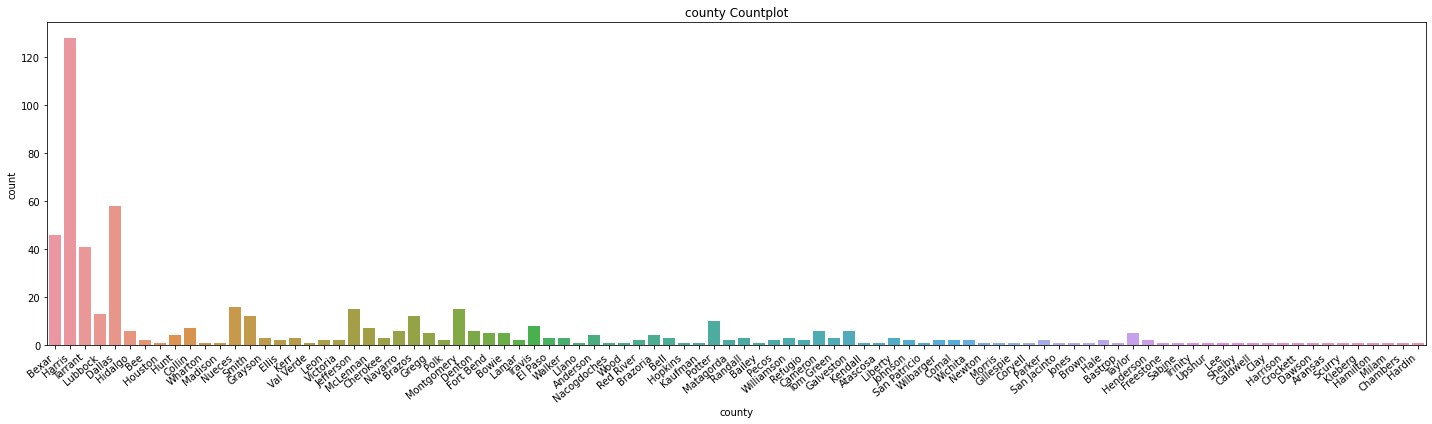

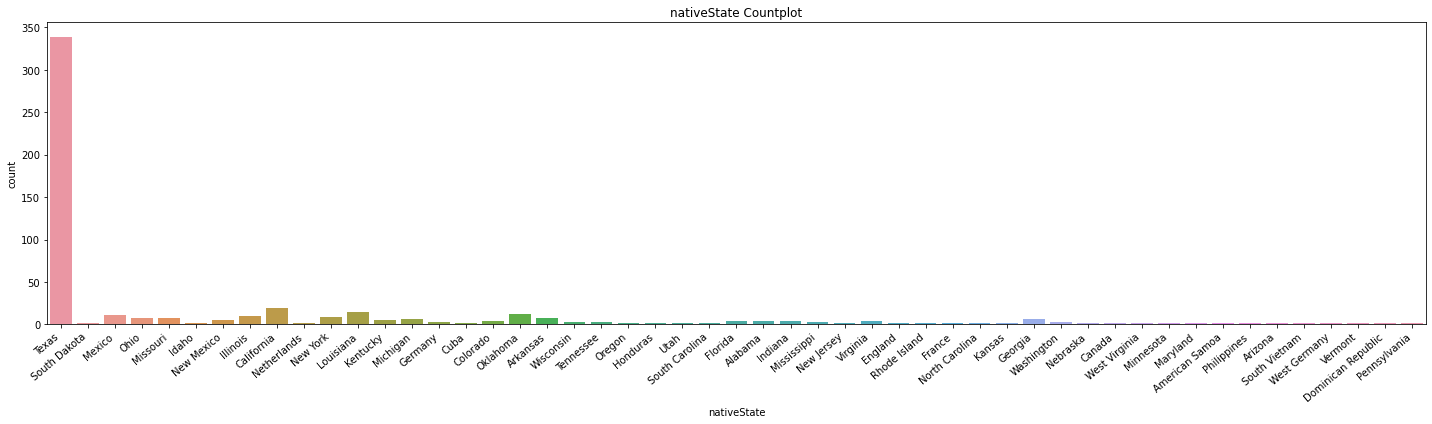

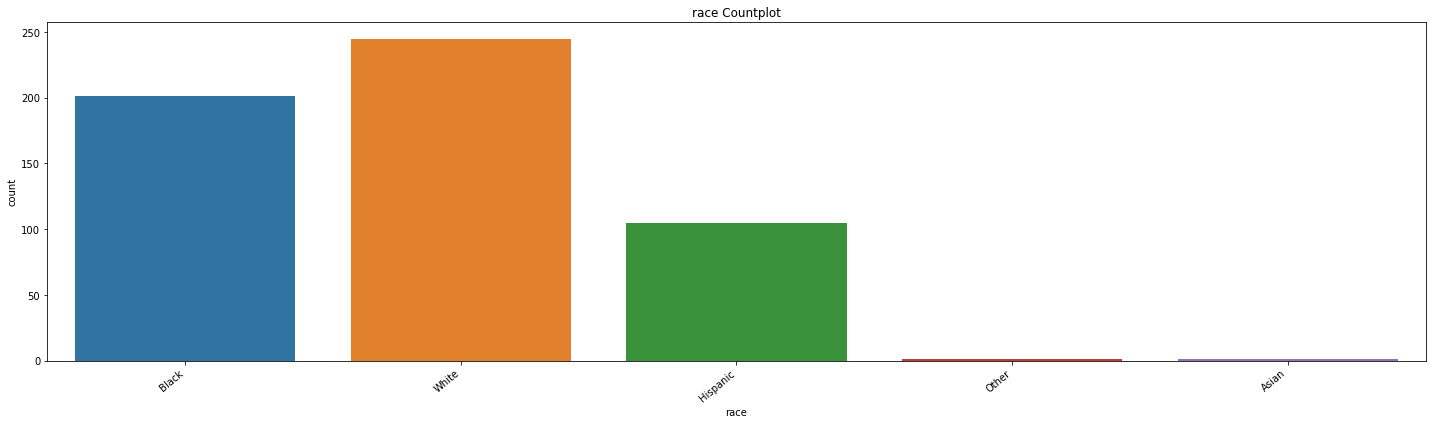

In [40]:
for col in df[catFeatures]:
    plt.figure(figsize = (20, 6))
    ax = sns.countplot(data = df, x = col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f'{col} Countplot')
    plt.tight_layout()
    plt.show()
    print()

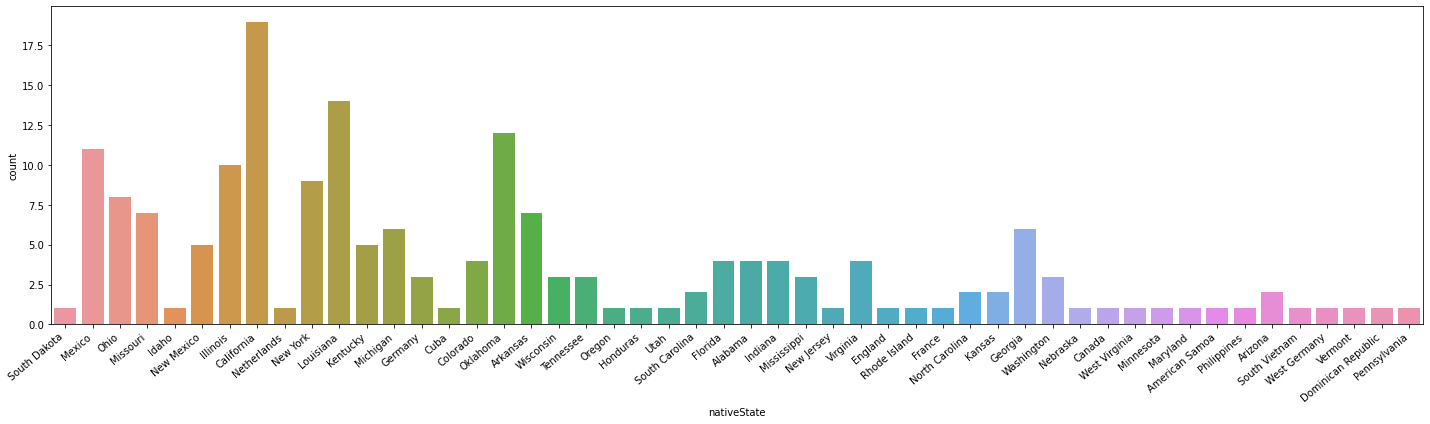

In [45]:
plt.figure(figsize = (20, 6))
ax = sns.countplot(data = df[df.nativeState != 'Texas'], x = 'nativeState')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

<AxesSubplot:>

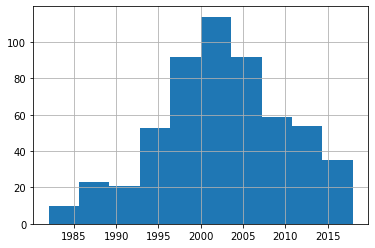

In [49]:
df.executionDateYear.hist()

In [54]:
df.dropna(inplace = True)

ageAtExecution Histogram



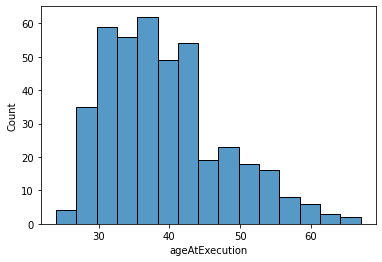

In [59]:
for col in df[numFeatures]:
    print(f'{col} Histogram')
    sns.histplot(df[col])
    print()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ageAtExecution'>

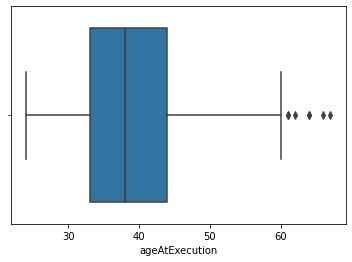

In [61]:
sns.boxplot(df.ageAtExecution)

## Lesson 5: Document everything you are doing
**...and why you are doing it** <br>
You will thank yourself later.

## Lesson 6: Don't ignore outliers. 
You may find something interesting there.

## Lesson 7: There are a lot of ways to engineer new features from dates

In [63]:
pd.to_datetime(df.dateOfOffence, format = '%Y-%m-%d')

0     2004-11-21
2     2003-12-03
3     2008-04-06
4     2005-09-13
5     2001-05-02
         ...    
520   1983-02-04
521   1980-10-25
523   1978-04-10
544   1975-11-29
552   1976-12-14
Name: dateOfOffence, Length: 414, dtype: datetime64[ns]

In [64]:
# convert date to datetime data type
df['dateOffense'] = pd.to_datetime(df.dateOfOffence, format = '%Y-%m-%d')


In [65]:
df["yearDateOffense"] = pd.DatetimeIndex(df["dateOffense"]).year
df["monthDateOffense"] = pd.DatetimeIndex(df["dateOffense"]).month
df["dayDateOffense"] = pd.DatetimeIndex(df["dateOffense"]).dayofyear
df["weekDaydateOffense"] = pd.DatetimeIndex(df["dateOffense"]).weekday

df.head(2)

,execution,tdcjNumber,firstName,lastName,dateOfOffence,dateReceived,executionDate,dateOfBirth,ageAtExecution,county,...,race,lastStatement,yearOfOffense,dateReceivedYear,executionDateYear,dateOffense,yearDateOffense,monthDateOffense,dayDateOffense,weekDaydateOffense
0,553,999508,Christopher,Young,2004-11-21,2006-03-31,2018-07-17,1983-09-24,34,Bexar,...,Black,l want to make sure the Patel family knows I l...,2004,2006,2018,2004-11-21,2004,11,326,6
2,551,999502,Juan,Castillo,2003-12-03,2005-09-27,2018-05-16,1981-04-03,37,Bexar,...,Hispanic,To everyone that has been there for me you kno...,2003,2005,2018,2003-12-03,2003,12,337,2


## Lesson 8: Add additional data onto your existing dataset.
It shows creativity.
<hr>

Sources:
- Create your own data (scrape, API requests, etc.)
- Find existing datasets

## Lesson 9: Don't waste time trying to create pixel perfect vizzes during EDA
This is plug and chug, rapid iteration to see if you can find anything interesting. Tidying will come later in explanatory analysis.

## Lesson 10: Domain knowledge is gold.
Spend some time to get familiar with the topic.